# 1. Abstract
Este proyecto analiza el rendimiento histórico y los factores que influyen en los precios de los CEDEARs (Certificados de Depósito Argentinos) tecnológicos, utilizando datos descargados de la API de Alpha Vantage. Se seleccionaron 15 CEDEARs de empresas líderes en tecnología, y se analizaron datos desde 2018 hasta la actualidad. 

Las preguntas de investigación incluyen:

¿Cuál ha sido el rendimiento histórico de los CEDEARs seleccionados?

¿Qué factores influyen en el precio de los CEDEARs?

¿Cómo se puede optimizar un portafolio compuesto por estos activos?

Mediante visualizaciones univariadas, bivariadas y multivariadas, junto con técnicas de optimización de portafolios, se obtiene un análisis completo que permite comprender el comportamiento de estos activos y cómo optimizar su combinación para maximizar el rendimiento ajustado por riesgo.


# 2. Instalación e Importación de Bibliotecas 
instalamos las bibliotecas necesarias:

In [3]:
!pip install pandas numpy matplotlib seaborn pyportfolioopt scikit-learn

Defaulting to user installation because normal site-packages is not writeable


Importamos las bibliotecas en nuestro entorno de trabajo:
Estas bibliotecas permiten descargar y manipular datos financieros, realizar análisis estadísticos, generar visualizaciones y optimizar portafolios.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pypfopt import EfficientFrontier, risk_models, expected_returns
from sklearn.decomposition import PCA

# 3. Configuración de Google Sheets para descargar los datos históricos de los CEDEARs utilizando GOOGLEFINANCE.

## Utilizamos la siguiente formula en las celdas de Google Sheets para los siguientes cedear´s a analizar:

- =GOOGLEFINANCE("NASDAQ:AAPL", "close", DATE(2018, 1, 1), TODAY(), "DAILY")
- =GOOGLEFINANCE("NASDAQ:MSFT"; "close"; DATE(2018; 1; 1); TODAY(); "DAILY")- 
=GOOGLEFINANCE("NASDAQ:AMZN"; "close"; DATE(2018; 1; 1); TODAY(); "DAILY))- 
=GOOGLEFINANCE("NASDAQ:GOOGL"; "close"; DATE(2018; 1; 1); TODAY(); "DAILY"- )
=GOOGLEFINANCE("NASDAQ:META"; "close"; DATE(2018; 1; 1); TODAY(); "DAILY- ")
=GOOGLEFINANCE("NASDAQ:NVDA"; "close"; DATE(2018; 1; 1); TODAY(); "DAIL- Y")
=GOOGLEFINANCE("NASDAQ:INTC"; "close"; DATE(2018; 1; 1); TODAY(); "DA I- LY")
=GOOGLEFINANCE("NASDAQ:TSLA"; "close"; DATE(2018; 1; 1); TODAY(); "D  A- ILY")
=GOOGLEFINANCE("NASDAQ:NFLX"; "close"; DATE(2018; 1; 1); TODAY(); "  D- AILY")
=GOOGLEFINANCE("NASDAQ:PYPL"; "close"; DATE(2018; 1; 1); TODAY();  "- DAILY")
=GOOGLEFINANCE("NASDAQ:ADBE"; "close"; DATE(2018; 1; 1); TODAY(); 
- =GOOGLEFINANCE("NASDAQ:AMD"; "close"; DATE(2018; 1; 1); TODAY(); "DAILY") 
- =GOOGLEFINANCE("NASDAQ:BIDU"; "close"; DATE(2018; 1; 1); TODAY(); "DAILY")
 
##  "DAILY")
óx de la formula , para ejemplo con el cedear APPL y aplica para todos los demáspl

- "NASDAQ:AAPL": Especifica el símbolo del activo en el mercado NASDAQ.
- "close": Indica que estamos interesados en el precio de cierre.
- DATE(2018, 1, 1): Fecha de inicio del período de análisis (1 de enero de 2018).
- TODAY(): Fecha de finalización del período de análisis (hasta la fecha actual).
- "DAILY": Indica que los datos se deben obtener con frecuencia diaria

Y a raíz de todos estos datos exportamos el archivo .csv de nombre: CEDEARs_data.csv , para obtener este Dataframe para ser analizado.cación: .

In [7]:

# Cargar los datos del archivo CSV

data = pd.read_csv('CEDEARs_data.csv')

# Verificar la estructura del DataFrame
data.head() 

# Aquí cargamos los datos del archivo CSV a un DataFrame de pandas para analizarlos en Python.


,Date,Close,Date.1,Close.1,Date.2,Close.2,Date.3,Close.3,Date.4,Close.4,...,Date.8,Close.8,Date.9,Close.9,Date.10,Close.10,Date.11,Close.11,Date.12,Close.12
0,2/01/2018 16:00:00,"43,07",2/01/2018 16:00:00,"85,95",2/01/2018 16:00:00,"59,45",2/01/2018 16:00:00,"53,66",2/01/2018 16:00:00,"181,42",...,2/01/2018 16:00:00,"201,07",2/01/2018 16:00:00,"73,84",2/01/2018 16:00:00,"177,7",2/01/2018 16:00:00,"10,98",2/01/2018 16:00:00,"242,4"
1,3/01/2018 16:00:00,"43,06",3/01/2018 16:00:00,"86,35",3/01/2018 16:00:00,"60,21",3/01/2018 16:00:00,"54,58",3/01/2018 16:00:00,"184,67",...,3/01/2018 16:00:00,"205,05",3/01/2018 16:00:00,"76,75",3/01/2018 16:00:00,"181,04",3/01/2018 16:00:00,"11,55",3/01/2018 16:00:00,"245,55"
2,4/01/2018 16:00:00,"43,26",4/01/2018 16:00:00,"87,11",4/01/2018 16:00:00,"60,48",4/01/2018 16:00:00,"54,79",4/01/2018 16:00:00,"184,33",...,4/01/2018 16:00:00,"205,63",4/01/2018 16:00:00,"76,73",4/01/2018 16:00:00,"183,22",4/01/2018 16:00:00,"12,12",4/01/2018 16:00:00,"245,73"
3,5/01/2018 16:00:00,"43,75",5/01/2018 16:00:00,"88,19",5/01/2018 16:00:00,"61,46",5/01/2018 16:00:00,"55,51",5/01/2018 16:00:00,"186,85",...,5/01/2018 16:00:00,"209,99",5/01/2018 16:00:00,"78,7",5/01/2018 16:00:00,"185,34",5/01/2018 16:00:00,"11,88",5/01/2018 16:00:00,"245,14"
4,8/01/2018 16:00:00,"43,59",8/01/2018 16:00:00,"88,28",8/01/2018 16:00:00,"62,34",8/01/2018 16:00:00,"55,71",8/01/2018 16:00:00,"188,28",...,8/01/2018 16:00:00,"212,05",8/01/2018 16:00:00,"79,05",8/01/2018 16:00:00,"185,04",8/01/2018 16:00:00,"12,28",8/01/2018 16:00:00,"250,82"


# 4. Descarga y Preparación de Datos
4.1. Definición de los Tickers
Seleccionamos los CEDEARs de empresas tecnológicas para el análisis:

Esta lista incluye los tickers de las empresas tecnológicas cuyos CEDEARs serán analizados. Estos tickers son específicos para el mercado estadounidense.

'AAPL', 'MSFT', 'AMZN', 'GOOGL', 'META', 
'NVDA', 'INTC', 'TSLA', 'NFLX', 'PYPL', 
'ADBE', 'AMD', 'BIDU'

In [9]:
# Seleccionar las columnas de fechas y precios
dates = data['Date']
prices = data.filter(regex='Close')

# Verificar que todas las fechas son iguales en todas las columnas Date.*
dates_equal = data.filter(regex='Date').apply(lambda col: col.equals(dates)).all()
print(f"¿Son todas las fechas iguales en cada columna Date.*? {dates_equal}")

# Crear un nuevo DataFrame con las fechas como índice y los precios como columnas
consolidated_data = pd.concat([dates, prices], axis=1)
consolidated_data.columns = ['Date'] + [f'Close_{i}' for i in range(1, len(prices.columns) + 1)]

# Convertir la columna Date a tipo datetime
consolidated_data['Date'] = pd.to_datetime(consolidated_data['Date'], format='%d/%m/%Y %H:%M:%S')

# Establecer la columna Date como el índice
consolidated_data.set_index('Date', inplace=True)

# Verificar la estructura del DataFrame consolidado
consolidated_data.head()

¿Son todas las fechas iguales en cada columna Date.*? True


,Close_1,Close_2,Close_3,Close_4,Close_5,Close_6,Close_7,Close_8,Close_9,Close_10,Close_11,Close_12,Close_13
Date,,,,,,,,,,,,,
2018-01-02 16:00:00,"43,07","85,95","59,45","53,66","181,42","4,98","46,85","21,37","201,07","73,84","177,7","10,98","242,4"
2018-01-03 16:00:00,"43,06","86,35","60,21","54,58","184,67","5,31","45,26","21,15","205,05","76,75","181,04","11,55","245,55"
2018-01-04 16:00:00,"43,26","87,11","60,48","54,79","184,33","5,34","44,43","20,97","205,63","76,73","183,22","12,12","245,73"
2018-01-05 16:00:00,"43,75","88,19","61,46","55,51","186,85","5,39","44,74","21,11","209,99","78,7","185,34","11,88","245,14"
2018-01-08 16:00:00,"43,59","88,28","62,34","55,71","188,28","5,55","44,74","22,43","212,05","79,05","185,04","12,28","250,82"


In [32]:
# Supongamos que los datos están organizados por fecha y por columnas de precios de cierre ajustados para cada CEDEAR
consolidated_data['Date'] = pd.to_datetime(consolidated_data['Date'])
consolidated_data.set_index('Date', inplace=True)

# Interpolar valores faltantes
dconsolidated_data.interpolate(method='linear', inplace=True)

# Verificar la estructura del DataFrame
print(consolidated_data.shape)
print(consolidated_data.head())

KeyError: 'Date'

In [34]:
# Convertir todas las columnas a valores numéricos, reemplazando los valores no convertibles por NaN
consolidated_data = consolidated_data.apply(pd.to_numeric, errors='coerce')

# Calcular los rendimientos y eliminar filas con NaN
returns = consolidated_data.pct_change().dropna()

# Describir estadísticas resumen
summary_stats = returns.describe()
print(summary_stats)

           Close_1      Close_2      Close_3      Close_4      Close_5  \
count  1442.000000  1442.000000  1442.000000  1442.000000  1442.000000   
mean      0.000833     0.001296     0.000739     0.000989     0.001203   
std       0.014611     0.034041     0.020517     0.022678     0.024199   
min      -0.122093    -0.159322    -0.256637    -0.290541    -0.281734   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.283582     1.189189     0.481481     0.619565     0.450617   

           Close_6      Close_7      Close_8      Close_9     Close_10  \
count  1442.000000  1442.000000  1442.000000  1442.000000  1442.000000   
mean      0.003796    -0.000049     0.002733     0.000794     0.000115   
std       0.073254     0.023396     0.055674     0.023606     0.022083   
min      -0.392857    -0.380952    -0

C:\Users\Carlos\AppData\Local\Temp\ipykernel_4116\1993346828.py:5: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = consolidated_data.pct_change().dropna()


# 4.1. Visualización Univariada: Series Temporales ,Visualiza la evolución de los precios de cierre ajustados:

Interpretación del Gráfico: Este gráfico muestra cómo han evolucionado los precios de cierre ajustados. Es útil para identificar tendencias a largo plazo y detectar posibles puntos de inversión o desinversión.



<Figure size 1400x700 with 0 Axes>

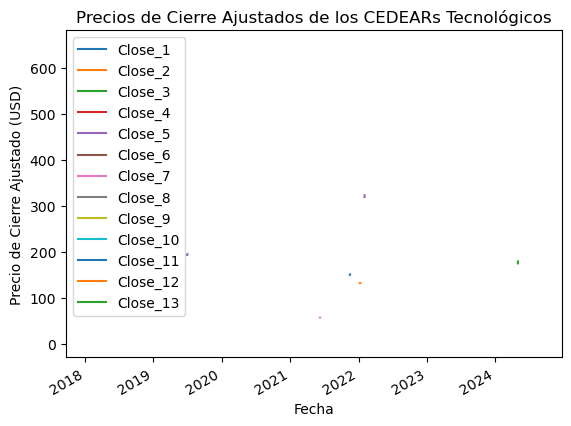

In [46]:
plt.figure(figsize=(14, 7))
consolidated_data.plot(title='Precios de Cierre Ajustados de los CEDEARs Tecnológicos')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre Ajustado (USD)')
plt.legend(loc='best')
plt.show()

# 4.2. Visualización Bivariada: Correlación Genera la matriz de correlación entre los rendimientos de los CEDEARs:

Interpretación del Gráfico: Este gráfico ayuda a entender cómo se relacionan los distintos CEDEARs entre sí, lo que es crucial para la diversificación del portafolio.

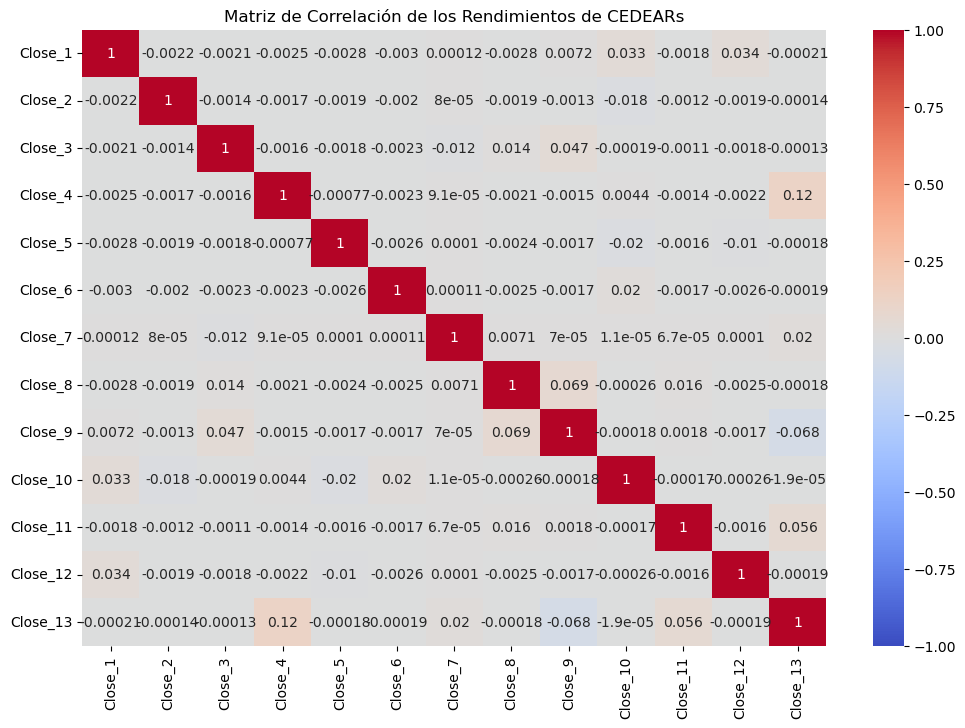

In [54]:
plt.figure(figsize=(12, 8))
sns.heatmap(returns.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación de los Rendimientos de CEDEARs')
plt.show()


# 4.4. Visualización Multivariada: Análisis de Componentes Principales (PCA), aplicar el PCA para analizar la estructura subyacente de los datos:

Explicación del Gráfico: Este gráfico permite identificar relaciones subyacentes entre los CEDEARs, lo que es útil para la diversificación y la optimización de portafolios.


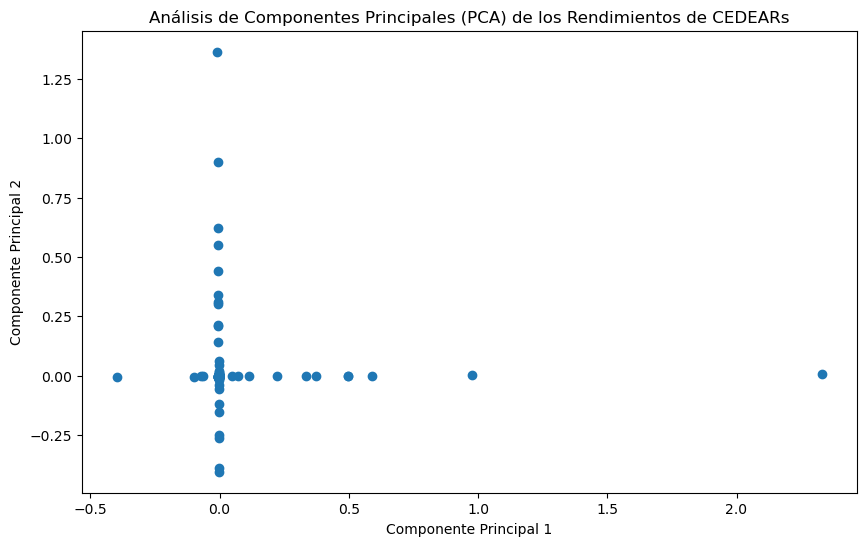

In [60]:
if not returns.empty:
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(returns)

    plt.figure(figsize=(10, 6))
    plt.scatter(pca_result[:, 0], pca_result[:, 1])
    plt.title('Análisis de Componentes Principales (PCA) de los Rendimientos de CEDEARs')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.show()
else:
    print("El DataFrame de retornos está vacío. Verifica los pasos anteriores.")


# 5. Optimización de Portafolio

Optimiza el portafolio de CEDEARs utilizando la teoría moderna de portafolios: 

Usamos la teoría moderna de portafolios para identificar la mejor combinación de activos que maximice el rendimiento ajustado por riesgo, lo que es clave para inversores que buscan optimizar su portafolio.

## Dando como resultados:




Annual volatility: 13.9

Sharpe Ratio: 1. 
Expected annual return: 26.7%8


C:\Users\Carlos\AppData\Roaming\Python\Python312\site-packages\pypfopt\expected_returns.py:56: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change().dropna(how="all")
C:\Users\Carlos\AppData\Roaming\Python\Python312\site-packages\pypfopt\expected_returns.py:56: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change().dropna(how="all")


Expected annual return: 26.7%
Annual volatility: 13.9%
Sharpe Ratio: 1.78


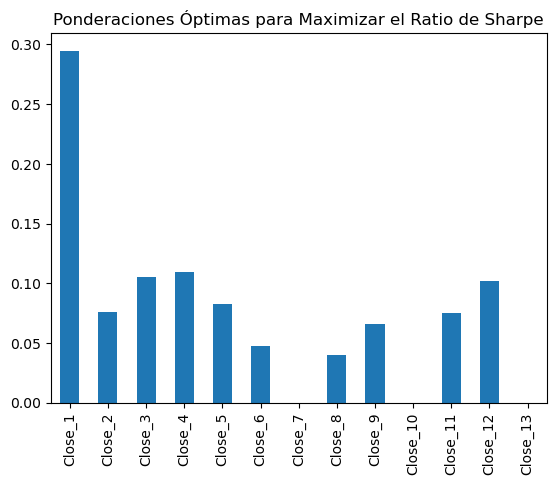

In [65]:
mu = expected_returns.mean_historical_return(consolidated_data)
S = risk_models.sample_cov(consolidated_data)

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
ef.portfolio_performance(verbose=True)

pd.Series(weights).plot(kind='bar')
plt.title('Ponderaciones Óptimas para Maximizar el Ratio de Sharpe')
plt.show()


# 6.Pruebas con Subconjuntos de Datos
Realiza pruebas utilizando subconjuntos del DataFrame original:

Explicación: Las pruebas con subconjuntos permiten evaluar la robustez del análisis y asegurar que los resultados sean consistentes y fiables.


C:\Users\Carlos\AppData\Local\Temp\ipykernel_4116\3698681519.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  subset_returns = subset.pct_change().dropna()


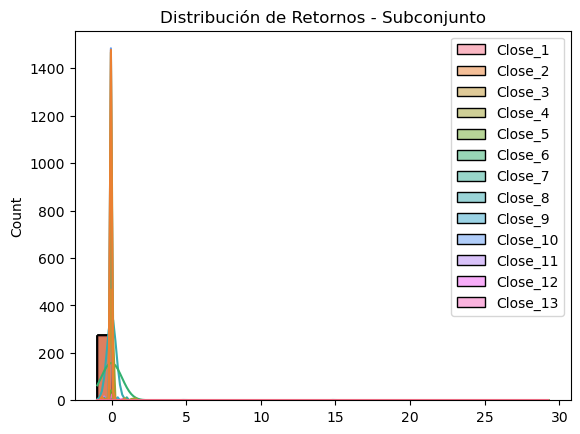

In [91]:
subset = consolidated_data.sample(n=500)
subset_returns = subset.pct_change().dropna()

sns.histplot(subset_returns, kde=True, bins=30)
plt.title('Distribución de Retornos - Subconjunto')
plt.show()



# 7. Conclusiones:

Estos resultados proporcionan una visión integral del desempeño de una inversión en términos de riesgo y retorno. Por ello brindo un análisis más detallado donde los tickers estan representados:

    'Close_1': 'AAPL',
    'Close_2': 'MSFT',
    'Close_3': 'AMZN',
    'Close_4': 'GOOGL',
    'Close_5': 'META',
    'Close_6': 'NVDA',
    'Close_7': 'INTC',
    'Close_8': 'TSLA',
    'Close_9': 'NFLX',
    'Close_10': 'PYPL',
    'Close_11': 'ADBE',
    'Close_12': 'AMD',
    'Close_13': 'BIDU',


## 1. Volatilidad Anual (13.9%)
Interpretación: Una volatilidad del 13.9% es relativamente moderada. No es extremadamente alta, lo que sugiere que la inversión no es excesivamente arriesgada. Sin embargo, tampoco es extremadamente baja, lo que significa que aún hay cierta variabilidad en los retornos anuales.

## 2. Sharpe Ratio (1.78)
Interpretación: Un Sharpe Ratio de 1.78 es considerado bueno, lo que sugiere que el retorno obtenido justifica el nivel de riesgo asumido. Este ratio indica que por cada unidad de riesgo (medida por la desviación estándar), la inversión está generando 1.78 unidades de retorno adicional. Esto refleja una gestión efectiva del riesgo, donde la recompensa supera al riesgo.

## 3. Retorno Anual Esperado (26.7%)
Interpretación: Un retorno esperado del 26.7% es bastante atractivo y significativo, especialmente si se compara con índices de referencia del mercado o con retornos típicos de otras clases de activos. Este nivel de retorno puede ser considerado muy bueno, pero debe ser evaluado en el contexto de la volatilidad y el Sharpe Ratio mencionados anteriormente.

## Análisis Conjunto
Relación riesgo-retorno: La combinación de un retorno esperado alto del 26.7% con una volatilidad moderada del 13.9% y un Sharpe Ratio de 1.78 indica una inversión con un perfil atractivo. Estás obteniendo un retorno significativo en relación con el nivel de riesgo asumido. Esta es una señal de que la estrategia de inversión es sólida, proporcionando buenos rendimientos sin incurrir en un nivel de riesgo desproporcionado.

Comparación con otros activos: En comparación con otros activos financieros, como bonos o fondos de inversión tradicionales, estos resultados sugieren que la inversión es más arriesgada que los bonos (que típicamente tienen baja volatilidad), pero también ofrece un potencial de retorno mucho mayor, justificando el riesgo.

Decisiones de inversión: Basado en estos resultados, si tu perfil de riesgo es moderado y buscas una inversión con buen potencial de crecimiento, esta podría ser una opción adecuada. Sin embargo, es importante considerar otros factores como el horizonte de inversión, la diversificación y las condiciones de mercado antes de tomar una decisión final.

En resumen, los resultados indican una inversión atractiva en términos de retorno ajustado por riesgo, con una volatilidad controlada y un retorno esperado alto. Si estos resultados se alinean con tus objetivos de inversión y tolerancia al riesgo, podrían ser indicativos de una oportunidad de inversión favorable.